In [1]:
from bokeh.io import output_notebook, show
from bokeh.charts import Scatter
from bokeh.charts import Line
from bokeh.charts import Histogram
import seaborn
import pandas as pd
import numpy as np
import csv
import os
os.chdir('/home/valesco/Datasets/CFB')
%matplotlib inline

In [2]:
output_notebook()

Loading BokehJS ...

In [20]:
nfl_df = pd.read_csv('nfl_game_log.csv')
def_df = pd.read_csv('nfl_defense_game_log.csv')
nfl_df.head()

player_id last_name first_name position team     game_id home_team  \
0  00-0030540    Dobson      Aaron       WR   NE  2013091200        NE   
1  00-0030540    Dobson      Aaron       WR   NE  2013092206        NE   
2  00-0030540    Dobson      Aaron       WR   NE  2013092912       ATL   
3  00-0030540    Dobson      Aaron       WR   NE  2013100601       CIN   
4  00-0030540    Dobson      Aaron       WR   NE  2013101310        NE   

  away_team              start_time day_of_week   ...    pass_tds  ints  \
0       NYJ  2013-09-12 19:25:00-05    Thursday   ...           0     0   
1        TB  2013-09-22 12:00:00-05      Sunday   ...           0     0   
2        NE  2013-09-29 19:30:00-05      Sunday   ...           0     0   
3        NE  2013-10-06 12:00:00-05      Sunday   ...           0     0   
4        NO  2013-10-13 15:25:00-05      Sunday   ...           0     0   

   pass_sacks  pass_sack_yds  punt_td  kick_td  rush_tpm  receiving_tpm  \
0           0              0        0        0         0              0   
1           0              0        0        0         0              0   
2           0              0        0        0         0              0   
3           0              0        0        0         0              0   
4           0              0        0        0         0              0   

   passing_tpm  points  
0            0    14.6  
1            0    10.7  
2            0     2.0  
3            0     6.9  
4            0    12.3  

[5 rows x 40 columns]

In [21]:
# Add columns

def add_bonus_cols(x, value):
    if x > value:
        return 3
    else:
        return 0
    
def time_line(df):
    year = int(df['season_year'])
    week = (int(df['week'])) / 18
    time = year + week
    return time
    
nfl_df['rec_bonus'] = nfl_df['rec_yds'].apply(lambda x: add_bonus_cols(x, 99))
nfl_df['rush_bonus'] = nfl_df['rush_yds'].apply(lambda x: add_bonus_cols(x, 99))
nfl_df['pass_bonus'] = nfl_df['pass_yds'].apply(lambda x: add_bonus_cols(x, 299))
nfl_df['total_points'] = nfl_df['points'] + nfl_df['rec_bonus'] + nfl_df['rush_bonus'] + nfl_df['pass_bonus']
nfl_df['full_name'] = nfl_df['last_name'] + ', ' + nfl_df['first_name']
nfl_df['points_ma2'] = nfl_df.groupby('full_name')['total_points'].apply(pd.rolling_mean, 2, min_periods = 2)
nfl_df['points_ma4'] = nfl_df.groupby('full_name')['total_points'].apply(pd.rolling_mean, 4, min_periods = 3)
nfl_df['points_ma8'] = nfl_df.groupby('full_name')['total_points'].apply(pd.rolling_mean, 8, min_periods = 7)
nfl_df['points_ma16'] = nfl_df.groupby('full_name')['total_points'].apply(pd.rolling_mean, 16, min_periods = 15)
nfl_df['time_line'] = nfl_df.apply(time_line, axis = 1)
nfl_df['opps'] = nfl_df['rec_targets'] + nfl_df['rush_atts'] + nfl_df['pass_att']
nfl_df['opps_avg'] = nfl_df.groupby('full_name')['opps'].apply(pd.rolling_mean, 4, min_periods = 1)

nfl_df.head()    

player_id last_name first_name position team     game_id home_team  \
0  00-0030540    Dobson      Aaron       WR   NE  2013091200        NE   
1  00-0030540    Dobson      Aaron       WR   NE  2013092206        NE   
2  00-0030540    Dobson      Aaron       WR   NE  2013092912       ATL   
3  00-0030540    Dobson      Aaron       WR   NE  2013100601       CIN   
4  00-0030540    Dobson      Aaron       WR   NE  2013101310        NE   

  away_team              start_time day_of_week    ...      pass_bonus  \
0       NYJ  2013-09-12 19:25:00-05    Thursday    ...               0   
1        TB  2013-09-22 12:00:00-05      Sunday    ...               0   
2        NE  2013-09-29 19:30:00-05      Sunday    ...               0   
3        NE  2013-10-06 12:00:00-05      Sunday    ...               0   
4        NO  2013-10-13 15:25:00-05      Sunday    ...               0   

   total_points      full_name  points_ma2  points_ma4  points_ma8  \
0          14.6  Dobson, Aaron         NaN         NaN         NaN   
1          10.7  Dobson, Aaron       12.65         NaN         NaN   
2           2.0  Dobson, Aaron        6.35       9.100         NaN   
3           6.9  Dobson, Aaron        4.45       8.550         NaN   
4          12.3  Dobson, Aaron        9.60       7.975         NaN   

   points_ma16    time_line  opps   opps_avg  
0          NaN  2013.111111    10  10.000000  
1          NaN  2013.166667     9   9.500000  
2          NaN  2013.222222     3   7.333333  
3          NaN  2013.277778     4   6.500000  
4          NaN  2013.333333    10   6.500000  

[5 rows x 52 columns]

In [31]:
def_df['total_points'] = def_df['base_points'] + def_df['score_pts']
def_df['time_line'] = def_df.apply(time_line, axis = 1)
def_df['full_name'] = def_df['last_name'].apply(lambda x: x.split('_')[0])
def_df.tail()

team  week     game_id home_team  home_score away_team  away_score  \
3579   SF    17  2016010315        SF          19       STL          16   
3580  STL    17  2016010315        SF          19       STL          16   
3581   TB    17  2016010312       CAR          38        TB          10   
3582  TEN    17  2016010305       IND          30       TEN          24   
3583  WAS    17  2016010307       DAL          23       WAS          34   

      season_year  sacks  ints    ...      punt_blks.1  misc_tds  base_points  \
3579         2015      0     0    ...                0         0            2   
3580         2015      1     1    ...                0         0            3   
3581         2015      4     0    ...                0         0            8   
3582         2015      1     1    ...                0         0            3   
3583         2015      4     2    ...                0         0           10   

      score_pts  total_points    time_line  position  last_name  first_name  \
3579          1             3  2015.944444       DEF    SF_last    SF_first   
3580          1             4  2015.944444       DEF   STL_last   STL_first   
3581         -4             4  2015.944444       DEF    TB_last    TB_first   
3582         -1             2  2015.944444       DEF   TEN_last   TEN_first   
3583          0            10  2015.944444       DEF   WAS_last   WAS_first   

      full_name  
3579         SF  
3580        STL  
3581         TB  
3582        TEN  
3583        WAS  

[5 rows x 28 columns]

In [99]:
nfl_df.sort_values(['game_id', 'team', 'last_name'], axis = 0)

player_id       last_name first_name position team     game_id  \
9890   00-0023465          Miller      Heath       TE  PIT  2009091000   
2128   00-0022924  Roethlisberger        Ben       QB  PIT  2009091000   
17434  00-0026901         Wallace       Mike       WR  PIT  2009091000   
13780  00-0027006           Britt      Kenny       WR  TEN  2009091000   
4789   00-0026164         Johnson      Chris       RB  TEN  2009091000   
5594   00-0026225         Stevens      Craig       TE  TEN  2009091000   
17670  00-0023367      Washington       Nate       WR  TEN  2009091000   
16641  00-0026143            Ryan       Matt       QB  ATL  2009091300   
8782   00-0024535           Weems       Eric       WR  ATL  2009091300   
19432  00-0023462           White      Roddy       WR  ATL  2009091300   
1616   00-0024268          Fasano    Anthony       TE  MIA  2009091300   
21086  00-0025396            Ginn        Ted       WR  MIA  2009091300   
3470   00-0027077        Hartline      Brian       WR  MIA  2009091300   
12076  00-0026158          Flacco        Joe       QB  BAL  2009091301   
8069   00-0025410            Bowe     Dwayne       WR   KC  2009091301   
10252  00-0026213         Charles     Jamaal       RB   KC  2009091301   
9201   00-0026281        Barnidge       Gary       TE  CAR  2009091302   
13000  00-0021206          McCown       Josh       QB  CAR  2009091302   
16609  00-0025708           Moore       Matt       QB  CAR  2009091302   
20744  00-0020337           Smith      Steve       WR  CAR  2009091302   
12428  00-0026153         Stewart   Jonathan       RB  CAR  2009091302   
6524   00-0024242        Williams   DeAngelo       RB  CAR  2009091302   
10885  00-0024324           Avant      Jason       WR  PHI  2009091302   
3345   00-0025549           Celek      Brent       TE  PHI  2009091302   
7066   00-0026189         Jackson     DeSean       WR  PHI  2009091302   
14839  00-0027029           McCoy     LeSean       RB  PHI  2009091302   
809    00-0026237        Caldwell      Andre       WR  CIN  2009091303   
4076   00-0021429          Palmer     Carson       QB  CIN  2009091303   
2931   00-0024334        Marshall    Brandon       WR  DEN  2009091303   
8357   00-0026182           Royal      Eddie       WR  DEN  2009091303   
...           ...             ...        ...      ...  ...         ...   
21013  00-0024279         Jackson   Tarvaris       QB  SEA  2016010314   
11721  00-0029159          Kearse   Jermaine       WR  SEA  2016010314   
22230  00-0032211         Lockett      Tyler       WR  SEA  2016010314   
5003   00-0030432         Michael  Christine       RB  SEA  2016010314   
13987  00-0031320           Smith      Kevin       WR  SEA  2016010314   
13477  00-0032250        Williams      Kasen       WR  SEA  2016010314   
19796  00-0029263          Wilson    Russell       QB  SEA  2016010314   
2577   00-0032062            Bell      Blake       TE   SF  2016010315   
1535   00-0022084          Boldin     Anquan       WR   SF  2016010315   
17297  00-0032063           Davis       Mike       RB   SF  2016010315   
3761   00-0031326       Ellington      Bruce       WR   SF  2016010315   
2568   00-0027948         Gabbert     Blaine       QB   SF  2016010315   
8011   00-0028409          Harris     DuJuan       RB   SF  2016010315   
10852  00-0031493           Hayne     Jarryd       RB   SF  2016010315   
22287  00-0030470        McDonald      Vance       TE   SF  2016010315   
18609  00-0030450          Patton    Quinton       WR   SF  2016010315   
21912  00-0027996           Smith     Torrey       WR   SF  2016010315   
21057  00-0030525          Austin      Tavon       WR  STL  2016010315   
13864  00-0027006           Britt      Kenny       WR  STL  2016010315   
15263  00-0031806           Brown    Malcolm       RB  STL  2016010315   
10755  00-0027061            Cook      Jared       TE  STL  2016010315   
2390   00-0029795      Cunningham      Benny       RB  STL  2016010315   
5593   00-00

In [6]:
qb_df = nfl_df.loc[(nfl_df['position'] == 'QB') & (nfl_df['pass_att'] > 9)]
rb_df = nfl_df.loc[(nfl_df['position'] == 'RB') & (nfl_df['rush_atts'] + nfl_df['rec_targets'] > 5)]
wr_df = nfl_df.loc[(nfl_df['position'] == 'WR') & (nfl_df['rec_targets'] > 2)]
te_df = nfl_df.loc[(nfl_df['position'] == 'TE') & (nfl_df['rec_targets'] > 2)]

In [82]:
hist = Histogram(qb_df['total_points'], title = 'QB Histogram', bins = 20)

show(hist)

In [83]:
hist = Histogram(wr_df['total_points'], title = 'WR Histogram', bins = 20)
show(hist)

In [84]:
hist = Histogram(rb_df['total_points'], title = 'RB Histogram', bins = 20)
show(hist)

In [85]:
hist = Histogram(te_df['total_points'], title = 'TE Histogram', bins = 20)
show(hist)

In [22]:
hist = Histogram(def_df['total_points'], title = 'DEF Histogram', bins = 20)
show(hist)

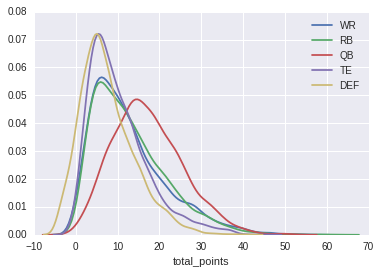

In [31]:
seaborn.distplot(wr_df.total_points, hist = False, bins = 10, label = 'WR')
seaborn.distplot(rb_df.total_points, hist = False, bins = 10, label = 'RB')
seaborn.distplot(qb_df.total_points, hist = False, bins = 10, label = 'QB')
seaborn.distplot(te_df.total_points, hist = False, bins = 10, label = 'TE')
seaborn.distplot(def_df.total_points, hist = False,bins = 10, label = 'DEF')

In [43]:
#create points scored for the past 3 years

comp_df = nfl_df[['full_name', 'position', 'week', 'team', 'season_year', 'total_points', 'time_line']]

In [44]:
def_df['position'] = 'DEF'
def_df['last_name'] = def_df['team'] + '_last'
def_df['first_name'] = def_df['team'] + '_first'
def_df['time_line'] = def_df.apply(time_line, axis = 1)
comp_df = comp_df.append(def_df[['full_name', 'position', 'week', 'team', 'season_year', 'total_points',
                                'time_line']])
comp_df

full_name position  week team  season_year  total_points  \
0      Dobson, Aaron       WR     2   NE         2013         14.60   
1      Dobson, Aaron       WR     3   NE         2013         10.70   
2      Dobson, Aaron       WR     4   NE         2013          2.00   
3      Dobson, Aaron       WR     5   NE         2013          6.90   
4      Dobson, Aaron       WR     6   NE         2013         12.30   
5      Dobson, Aaron       WR     7   NE         2013          6.40   
6      Dobson, Aaron       WR     8   NE         2013         16.00   
7      Dobson, Aaron       WR     9   NE         2013         33.00   
8      Dobson, Aaron       WR    11   NE         2013          7.80   
9      Dobson, Aaron       WR    16   NE         2013          3.10   
10     Dobson, Aaron       WR    17   NE         2013          1.60   
11     Dobson, Aaron       WR     2   NE         2014          2.30   
12     Dobson, Aaron       WR     5   NE         2014          2.60   
13     Dobson, Aaron       WR     6   NE         2014          1.90   
14     Dobson, Aaron       WR    13   NE         2014          0.00   
15     Dobson, Aaron       WR     1   NE         2015          1.90   
16     Dobson, Aaron       WR     2   NE         2015         15.70   
17     Dobson, Aaron       WR     3   NE         2015          1.50   
18     Dobson, Aaron       WR     7   NE         2015          3.80   
19     Dobson, Aaron       WR    10   NE         2015          1.50   
20     Dobson, Aaron       WR    11   NE         2015          2.70   
21    Rodgers, Aaron       QB     1   GB         2009         14.06   
22    Rodgers, Aaron       QB     2   GB         2009         18.74   
23    Rodgers, Aaron       QB     3   GB         2009         28.56   
24    Rodgers, Aaron       QB     4   GB         2009         25.96   
25    Rodgers, Aaron       QB     6   GB         2009         24.22   
26    Rodgers, Aaron       QB     7   GB         2009         24.14   
27    Rodgers, Aaron       QB     8   GB         2009         28.68   
28    Rodgers, Aaron       QB     9   GB         2009         24.24   
29    Rodgers, Aaron       QB    10   GB         2009         19.06   
...              ...      ...   ...  ...          ...           ...   
3554             BAL      DEF    17  BAL         2015          3.00   
3555             BUF      DEF    17  BUF         2015          8.00   
3556             CAR      DEF    17  CAR         2015         12.00   
3557             CHI      DEF    17  CHI         2015          4.00   
3558             CIN      DEF    17  CIN         2015          6.00   
3559             CLE      DEF    17  CLE         2015          5.00   
3560             DAL      DEF    17  DAL         2015          2.00   
3561             DEN      DEF    17  DEN         2015          6.00   
3562             DET      DEF    17  DET         2015         11.00   
3563              GB      DEF    17   GB         2015          8.00   
3564             HOU      DEF    17  HOU         2015         29.00   
3565             IND      DEF    17  IND         2015         12.00   
3566             JAC      DEF    17  JAC         2015          3.00   
3567              KC      DEF    17   KC         2015         13.00   
3568             MIA      DEF    17  MIA         2015          6.00   
3569             MIN      DEF    17  MIN         2015         19.00   
3570              NE      DEF    17   NE         2015          2.00   
3571              NO      DEF    17   NO         2015          8.00   
3572             NYG      DEF    17  NYG         2015          1.00   
3573             NYJ      DEF    17  NYJ         2015          4.00   
3574             OAK      DEF    17  OAK         2015         11.00   
3575             PHI      DEF    17  PHI         2015          9.00   
3576             PIT      DEF    17  PIT         2015         19.00   
3577              SD      DEF    17   SD         2015         12.00   
3578             SEA      DEF    17

In [45]:
comp_df = comp_df.sort_values(by = ['week', 'season_year', 'total_points'], ascending = [True, True, False])
comp_df.to_csv('nfl_total_points.csv')